__5*.__ Даны две функции $y_{1}=f(x)$ и $y_{2}=g(x)$. Известно, что:

### $$f'(x)=\frac{1}{2}g(x)$$

### $$g'(x)=2-2f(x)$$

### $$f(0)=0$$

### $$g(0)=1$$

Восстановить функции $y_{1}=f(x)$ и $y_{2}=g(x)$ с помощью формулы:

### $$f(x+\Delta x) \approx f(x)+f'(x) \cdot \Delta x$$

на участке $[0, 20]$

В качестве решения построить график этих функций в одной системе координат.


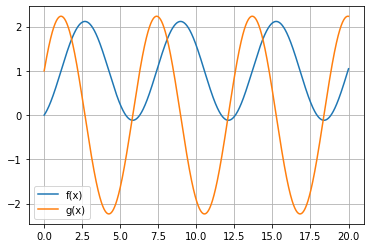

In [21]:
import numpy as np
from scipy.interpolate import splev, splrep
%matplotlib inline
import matplotlib.pyplot as plt

n = 10000
a = 0
b = 20
delta = b/n
x = np.arange(a, b, delta)
x = np.append(x,b)

f_d = np.array([0])
g_d = np.array([1])

while(n != 0):
    f_d = np.append(f_d,f_d[len(f_d)-1] + 0.5 * g_d[len(g_d)-1] * delta)
    g_d = np.append(g_d,g_d[len(g_d)-1] + (2 - 2 * f_d[len(f_d)-1]) * delta)
    n -= 1

f_spl = splrep(x, f_d)
g_spl = splrep(x, g_d)

def f_func(k):
    return splev(k, f_spl)

def g_func(k):
    return splev(k, g_spl)

plt.plot(x, f_func(x), label = 'f(x)')
plt.plot(x, g_func(x), label = 'g(x)')
plt.grid()
plt.legend()
plt.show()

__6**.__ Найти все корни уравнения:
    
### $$f(x)=g(x)$$

на участке $[0, 20]$

Где $y_{1}=f(x)$ и $y_{2}=g(x)$ - функции из предыдущего решения.

In [23]:
import numpy as np
from scipy.optimize import fsolve, broyden2
import math

def equations(p):
    x = p
    return f_func(x)-g_func(x)

solv = set()
for x in np.arange (0, 20, 1):
    x, info, ier, mesg =  fsolve(equations, x, full_output=True)
    if ier == 1 and 0 <= x <= 20:
        solv.add(int(x*10**8)/10**8)
            
print (solv)

{1.8027806, 5.76740613, 8.08596486, 12.05059039, 14.36914912, 18.33377465}
